In [28]:

import pandas as pd
import numpy as np
import os

In [29]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
home_directory = os.path.expanduser("~")
omnetpp_directory = os.path.join(home_directory, "omnetpp-6.0.2")
vec_directory = os.path.join(omnetpp_directory, "samples", "thesis", "results")

In [30]:
# dispatchingAlgos = ["DLAGO-TP", "D2FO", "GreedyPartition", "RandomPartition", "RandomWalk", "Random", "Local"]
# schedulingAlgos = ["EDF", "EDF", "EDF", "EDF", "EDF", "EDF", "FIFO"]
dispatchingAlgos = ["DLAGO-TP", "D2FO","GreedyPartition", "RandomPartition"]
schedulingAlgos = ["EDF", "EDF", "EDF", "EDF"]


numUsers = [user for user in range(500, 2001, 100)]
repetition = 1
for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    for numUser in numUsers:
        for i in range(repetition):
            command_vec = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-vec.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.vec"
            command_sca = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.sca"
            os.system(command_vec)
            os.system(command_sca)


Exported 501 vectors
Exported 9 scalars, 12926 parameters
Exported 501 vectors
Exported 9 scalars, 12926 parameters
Exported 501 vectors
Exported 9 scalars, 12926 parameters
Exported 501 vectors
Exported 9 scalars, 12926 parameters
Exported 501 vectors
Exported 9 scalars, 12926 parameters
Exported 501 vectors
Exported 9 scalars, 14426 parameters
Exported 501 vectors
Exported 9 scalars, 14426 parameters
Exported 501 vectors
Exported 9 scalars, 14426 parameters
Exported 501 vectors
Exported 9 scalars, 14426 parameters
Exported 501 vectors
Exported 9 scalars, 14426 parameters
Exported 501 vectors
Exported 9 scalars, 15926 parameters
Exported 501 vectors
Exported 9 scalars, 15926 parameters
Exported 501 vectors
Exported 9 scalars, 15926 parameters
Exported 501 vectors
Exported 9 scalars, 15926 parameters
Exported 501 vectors
Exported 9 scalars, 15926 parameters
Exported 501 vectors
Exported 9 scalars, 17426 parameters
Exported 501 vectors
Exported 9 scalars, 17426 parameters
Exported 501 v

In [31]:

algoCompletionRate = []
algoCompletionTime = []
algoTotalReward = []

for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    completionRateWithDiffNumUsers = []
    completionTimeWithDiffNumUsers = []
    rewardWithDiffNumUsers = []
    for numUser in numUsers:
        accumulateCompletionRate = 0
        accumulateCompletionTime = 0
        accumulateReward = 0
        for i in range(repetition):
            sca_out = pd.read_csv(f"{vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv")
            # print(f"{dispatchingAlgo}-{schedulingAlgos[idx]}-{numUser}-{i}")
            # if i == 0:
            #     display(sca_out[(sca_out['type'] == 'scalar')])
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar') & (sca_out['name'] == 'isCompleted:mean')]
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar')]
            accumulateCompletionRate += float(sca_mean_row[sca_mean_row['name'] == 'isCompleted:mean'].iloc[0]['value'])
            accumulateCompletionTime += float(sca_mean_row[sca_mean_row['name'] == 'totalTime:mean'].iloc[0]['value'])
            accumulateReward += float(sca_mean_row[sca_mean_row['name'] == 'totalReward:sum'].iloc[0]['value'])
        avgCompletionRate = accumulateCompletionRate / repetition
        avgCompletionTime = accumulateCompletionTime / repetition
        avgReward = accumulateReward / repetition
        completionRateWithDiffNumUsers.append(avgCompletionRate)
        completionTimeWithDiffNumUsers.append(avgCompletionTime)
        rewardWithDiffNumUsers.append(avgReward)
    algoCompletionRate.append(completionRateWithDiffNumUsers)
    algoCompletionTime.append(completionTimeWithDiffNumUsers)
    algoTotalReward.append(rewardWithDiffNumUsers)


# # Define the maximum width for each variable
# dispatching_width = 15
# scheduling_width = 5
# completion_rate_width = 5

# for idx in range(len(dispatchingAlgos)):
#     print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionRate is ", end="")
#     for j in range(len(numUsers)):
#         print(f"{algoCompletionRate[idx][j]:.6f}", end=" ")
#     print()

# print()
# for idx in range(len(dispatchingAlgos)):
#     print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionTime is ", end="")
#     for j in range(len(numUsers)):
#         print(f"{algoCompletionTime[idx][j]:.6f}", end=" ")
#     print()

# print()
# for idx in range(len(dispatchingAlgos)):
#     print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} reward is ", end="")
#     for j in range(len(numUsers)):
#         print(f"{algoTotalReward[idx][j]}", end=" ")
#     print()



In [32]:
import pandas as pd

completion_rate_data = {}
for idx, completion_rate in enumerate(algoCompletionRate):
    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgos[idx]}"
    completion_rate_data[algo_key] = completion_rate

completion_rate_df = pd.DataFrame(completion_rate_data, index=numUsers).transpose()
completion_rate_df.to_csv(f"{vec_directory}/completion_rate.csv")


completion_time_data = {}
for idx, completion_time in enumerate(algoCompletionTime):
    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgos[idx]}"
    completion_time_data[algo_key] = completion_time

completion_time_df = pd.DataFrame(completion_time_data, index=numUsers).transpose()
completion_time_df.to_csv(f"{vec_directory}/completion_time.csv")

reward_data = {}
for idx, reward in enumerate(algoTotalReward):
    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgos[idx]}"
    reward_data[algo_key] = reward

reward_df = pd.DataFrame(reward_data, index=numUsers).transpose()
reward_df.to_csv(f"{vec_directory}/reward.csv")

,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
DLAGO-TP,99.94,99.85,99.66,99.38,99.06,98.65,97.96,97.00,95.17,91.65,86.97,82.23,77.69,73.56,69.74,66.28
D2FO,99.69,99.52,99.19,98.72,98.17,97.42,96.04,94.45,92.25,89.06,85.38,81.62,77.92,74.32,70.90,67.76
GreedyPartition,99.92,99.82,99.57,99.23,98.82,98.26,97.27,96.07,93.85,89.85,84.65,79.32,74.17,69.59,65.40,61.70
RandomPartition,99.57,99.26,98.79,97.92,96.95,95.54,93.27,90.69,87.44,83.06,78.23,73.45,68.92,64.81,60.85,57.34


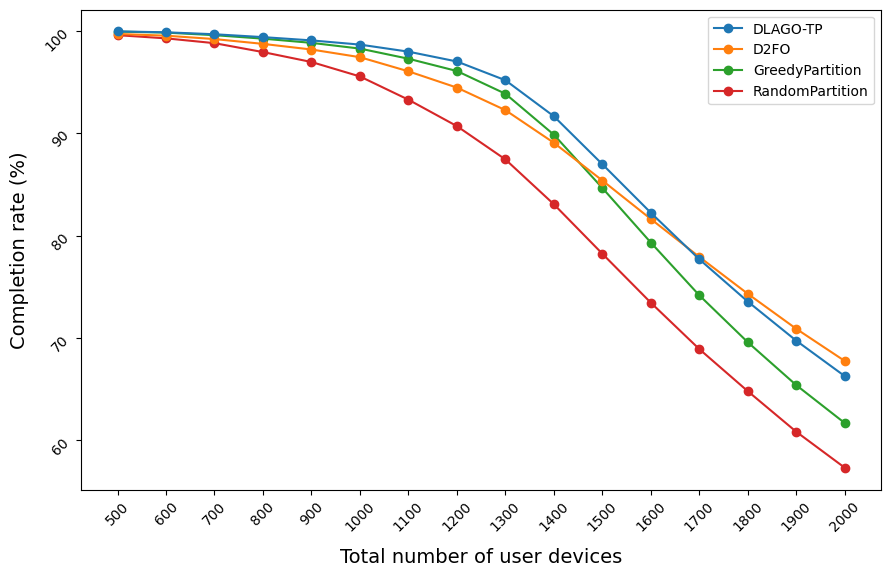

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

completion_rate_df = pd.read_csv(f"{vec_directory}/completion_rate.csv", index_col=0)
index = completion_rate_df.index
columns = completion_rate_df.columns
completion_rate_df = completion_rate_df.apply(pd.to_numeric, errors='coerce')
completion_rate_df.index = index
completion_rate_df.columns = columns

completion_rate_df = completion_rate_df.mul(100)
completion_rate_df = completion_rate_df.round(2)
display(completion_rate_df)


fig1 = plt.figure(figsize=(10,6))

columns = completion_rate_df.columns
x_values = range(len(columns))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.tick_params(labelrotation=45)

p0 = ax1.plot(x_values, completion_rate_df.iloc[0], marker='o', zorder=7)  
p1 = ax1.plot(x_values, completion_rate_df.iloc[1], marker='o', zorder=6)
p2 = ax1.plot(x_values, completion_rate_df.iloc[2], marker='o', zorder=5)
p3 = ax1.plot(x_values, completion_rate_df.iloc[3], marker='o', zorder=4)
# p4 = ax1.plot(x_values, completion_rate_df.iloc[4], marker='o', zorder=3)
# p5 = ax1.plot(x_values, completion_rate_df.iloc[5], marker='o', zorder=2)
# p6 = ax1.plot(x_values, completion_rate_df.iloc[6], marker='o', zorder=1)


ax1.legend(handles=[p0[0], p1[0], p2[0], p3[0]], 
           labels=[completion_rate_df.iloc[0].name, completion_rate_df.iloc[1].name, completion_rate_df.iloc[2].name, completion_rate_df.iloc[3].name])

# ax1.legend(handles=[p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]], 
#            labels=[completion_rate_df.iloc[0].name, completion_rate_df.iloc[1].name, completion_rate_df.iloc[2].name, completion_rate_df.iloc[3].name,
#                    completion_rate_df.iloc[4].name, completion_rate_df.iloc[5].name, completion_rate_df.iloc[6].name])


plt.ylabel('Completion rate (%)', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('Total number of user devices', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Rate", pad=20, fontsize=16)
plt.show()
fig1.savefig(f'{vec_directory}/completion_rate_graph.svg', format="svg", bbox_inches = "tight")


,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000
DLAGO-TP,54.95,57.31,60.09,63.94,67.99,73.95,81.91,90.80,100.37,109.67,116.63,121.67,125.67,128.70,131.38,133.62
D2FO,92.78,94.69,96.77,98.99,101.33,104.10,107.50,110.84,114.38,118.22,121.84,125.29,128.42,131.31,133.92,136.27
GreedyPartition,98.68,101.24,103.66,106.46,109.10,112.49,116.56,120.78,125.46,130.71,135.56,139.86,143.57,146.58,149.33,151.68
RandomPartition,100.41,103.62,106.70,110.00,113.03,116.37,120.12,123.88,127.41,131.40,135.16,138.66,141.81,144.85,147.60,150.20


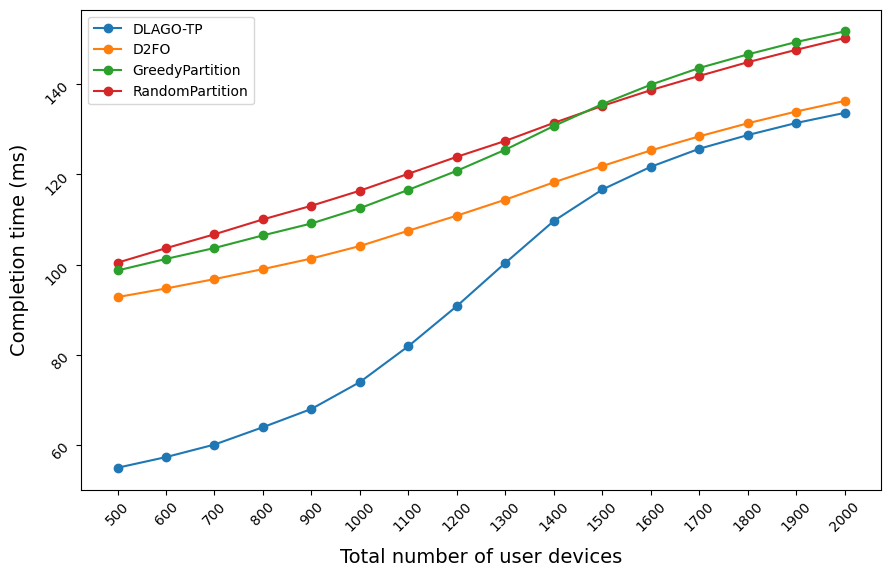

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

completion_time_df = pd.read_csv(f"{vec_directory}/completion_time.csv", index_col=0)
index = completion_time_df.index
columns = completion_time_df.columns
completion_time_df = completion_time_df.apply(pd.to_numeric, errors='coerce')
completion_time_df.index = index
completion_time_df.columns = columns

completion_time_df = completion_time_df.mul(1000)
completion_time_df = completion_time_df.round(2)
display(completion_time_df)



fig2 = plt.figure(figsize=(10,6))

columns = completion_time_df.columns
x_values = range(len(columns))

ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.tick_params(labelrotation=45)
p0 = ax2.plot(x_values, completion_time_df.iloc[0], marker='o', zorder=7)
p1 = ax2.plot(x_values, completion_time_df.iloc[1], marker='o', zorder=6)
p2 = ax2.plot(x_values, completion_time_df.iloc[2], marker='o', zorder=5)
p3 = ax2.plot(x_values, completion_time_df.iloc[3], marker='o', zorder=4)
# p4 = ax2.plot(x_values, completion_time_df.iloc[4], marker='o', zorder=3)
# p5 = ax2.plot(x_values, completion_time_df.iloc[5], marker='o', zorder=2)
# p6 = ax2.plot(x_values, completion_time_df.iloc[6], marker='o', zorder=1)

ax2.legend(handles=[p0[0], p1[0], p2[0], p3[0]], 
           labels=[completion_time_df.iloc[0].name, completion_time_df.iloc[1].name, completion_time_df.iloc[2].name, completion_time_df.iloc[3].name])

# ax2.legend(handles=[p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]], 
#            labels=[completion_time_df.iloc[0].name, completion_time_df.iloc[1].name, completion_time_df.iloc[2].name, completion_time_df.iloc[3].name,
#                    completion_time_df.iloc[4].name, completion_time_df.iloc[5].name, completion_time_df.iloc[6].name])

plt.ylabel('Completion time (ms)', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('Total number of user devices', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Time", pad=20, fontsize=16)
plt.show()
fig2.savefig(f'{vec_directory}/completion_time_graph.svg', format="svg", bbox_inches = "tight")


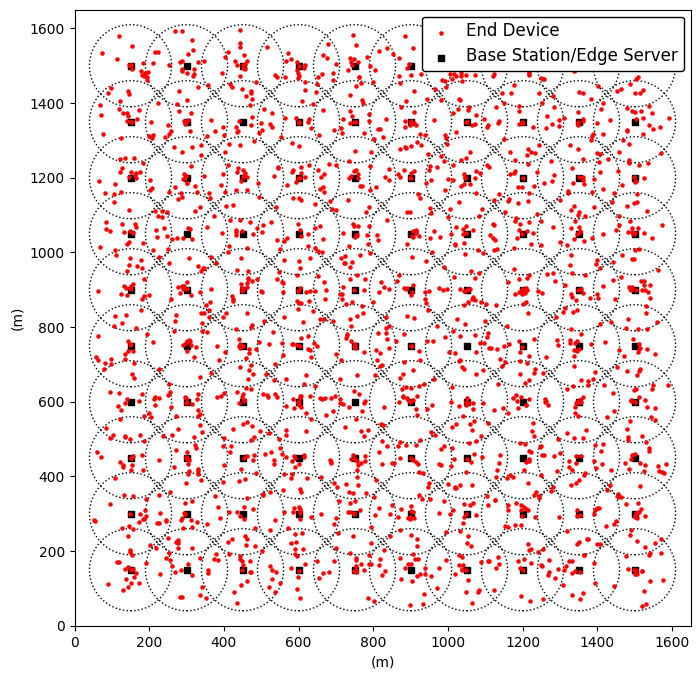

In [35]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y



# Generate coordinates for each base station
num_rows = 10
num_columns = 10
distance = 150
base_station_x_coords = []
base_station_y_coords = []
for x in range(distance, (num_rows + 1) * distance, distance):
    for y in range(distance, (num_columns + 1) * distance, distance):
        base_station_x_coords.append(x)
        base_station_y_coords.append(y)


# Generate random coordinates for users
num_users = 2000  # Number of users
num_users_per_region = num_users // (num_rows * num_columns)
user_x_coords = []
user_y_coords = []
for base_station_x, base_station_y in zip(base_station_x_coords, base_station_y_coords):
    for i in range(num_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# create figure
plt.figure(figsize=(10, 8))


# plot base station
base_station_scatter = plt.scatter(base_station_x_coords, base_station_y_coords, color='black', marker='s', s=20, label='Base Station/Edge Server')
for x, y in zip(base_station_x_coords, base_station_y_coords):
    circle = plt.Circle((x, y), 110, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)


# Plot the users
end_device_scatter = plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5, label='End Device')

# Set labels and title
# plt.title('Base Stations Grid with Users')
plt.xlabel('(m)')
plt.ylabel('(m)')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

legend = plt.legend(handles=[end_device_scatter, base_station_scatter], loc='upper right', fancybox=True, framealpha=1, edgecolor='black')
plt.setp(legend.get_texts(), fontsize='large')

plt.savefig(f'{vec_directory}/environment_uniform.svg', format='svg', bbox_inches = "tight")

# Show the graph
plt.show()

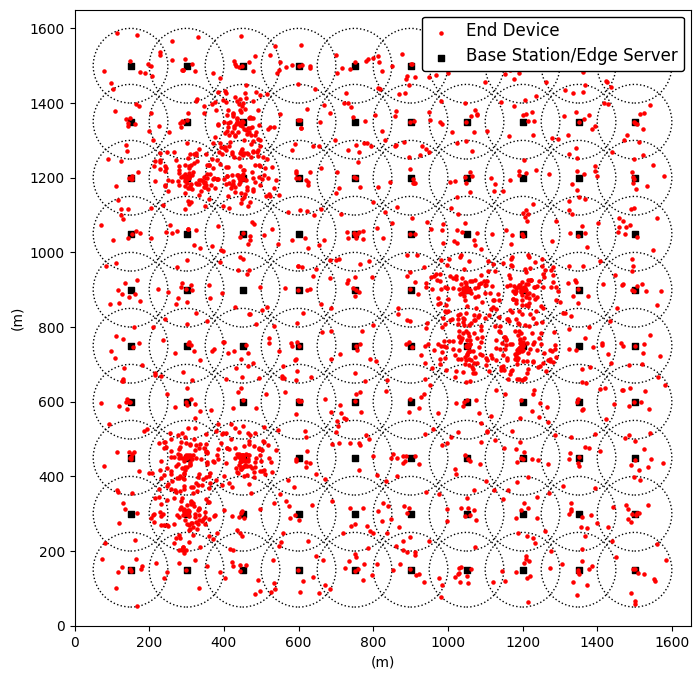

In [36]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y


# Generate coordinates for each base station
num_rows = 10
num_columns = 10
distance = 150
base_station_x_coords = []
base_station_y_coords = []
for y in range(distance, (num_columns + 1) * distance, distance):
    for x in range(distance, (num_rows + 1) * distance, distance):
        base_station_x_coords.append(x)
        base_station_y_coords.append(y)


# Generate random coordinates for users
user_x_coords = []
user_y_coords = []
num_users = 2000
hotspot_percent = 0.4
hotspot_idx = [11, 21, 22, 71, 72, 82, 46, 47, 56, 57]
hotspot_users_per_region = math.floor(num_users * hotspot_percent / len(hotspot_idx))
for idx in hotspot_idx:
    for i in range(hotspot_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x_coords[idx], base_station_y_coords[idx], 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


users_per_region = math.floor(num_users * (1 - hotspot_percent) / (num_rows * num_columns))
for base_station_x, base_station_y in zip(base_station_x_coords, base_station_y_coords):
    for i in range(users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)



# create figure
plt.figure(figsize=(10, 8))

# Plot the base stations
base_station_scatter = plt.scatter(base_station_x_coords, base_station_y_coords, color='black', marker='s', s=20, label='Base Station/Edge Server')
for x, y in zip(base_station_x_coords, base_station_y_coords):
    circle = plt.Circle((x, y), 100, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)


# Set labels and title
# plt.title('Base Stations Grid with Users')
plt.xlabel('(m)')
plt.ylabel('(m)')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

legend = plt.legend(handles=[end_device_scatter, base_station_scatter], loc='upper right', fancybox=True, framealpha=1, edgecolor='black')
plt.setp(legend.get_texts(), fontsize='large')

plt.savefig(f'{vec_directory}/environment_hotspot.svg', format='svg', bbox_inches = "tight")


# Show the graph

plt.show()